In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/customers.csv', sep=';')
df = df.drop(columns=['duration', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'contact'])
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [3]:
X = df.iloc[:, :-1].values
X

array([[58, 'management', 'married', ..., 2143, 'yes', 'no'],
       [44, 'technician', 'single', ..., 29, 'yes', 'no'],
       [33, 'entrepreneur', 'married', ..., 2, 'yes', 'yes'],
       ...,
       [72, 'retired', 'married', ..., 5715, 'no', 'no'],
       [57, 'blue-collar', 'married', ..., 668, 'no', 'no'],
       [37, 'entrepreneur', 'married', ..., 2971, 'no', 'no']],
      dtype=object)

In [4]:
y = df.iloc[:, -1].values
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

## Encoding categorical data

How do we want to encode this?

One-hot encoding:
- job
- marital

Ordinal encoding:
- education
- default
- housing
- loan

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

nominal = [1, 2]
ordinal = [3, 4, 6, 7]

ct = ColumnTransformer(
    transformers=[
        ('onehot_encoder', OneHotEncoder(), nominal),
        ('ordinal_encoder', OrdinalEncoder(), ordinal)
    ],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))
pd.DataFrame(X).to_csv('data/data-preprocessing/X_encoded_01.csv')
X

array([[0.0, 0.0, 0.0, ..., 0.0, 58, 2143],
       [0.0, 0.0, 0.0, ..., 0.0, 44, 29],
       [0.0, 0.0, 1.0, ..., 1.0, 33, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 72, 5715],
       [0.0, 1.0, 0.0, ..., 0.0, 57, 668],
       [0.0, 0.0, 1.0, ..., 0.0, 37, 2971]], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Distribution

In [8]:
df.describe().round()

,age,balance
count,45211.0,45211.0
mean,41.0,1362.0
std,11.0,3045.0
min,18.0,-8019.0
25%,33.0,72.0
50%,39.0,448.0
75%,48.0,1428.0
max,95.0,102127.0


Mean: 40.94
Std: 10.62


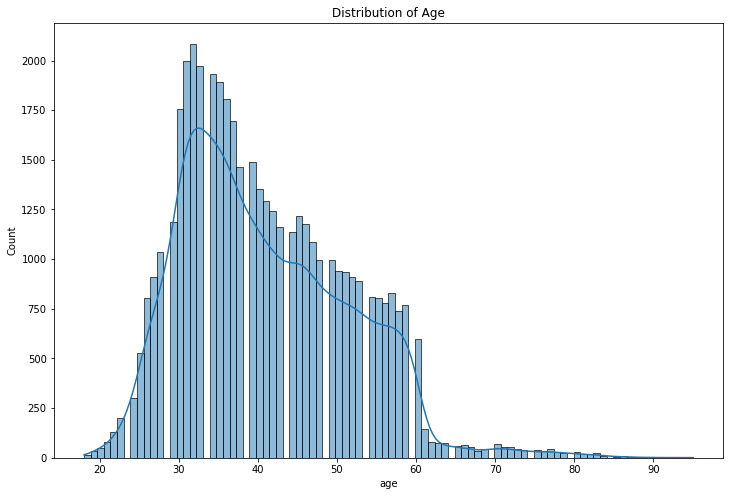

In [9]:
print('Mean: {:.2f}'.format(df.age.mean()))
print('Std: {:.2f}'.format(df.age.std()))

plt.figure(figsize=(12, 8))
plt.title('Distribution of Age')
sns.histplot(data=df, x='age', kde=True);

Mean: 1362.27
Std: 3044.77


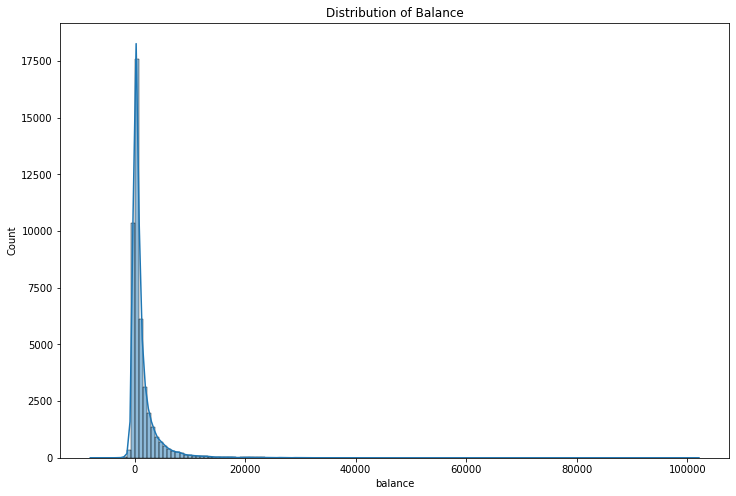

In [10]:
print('Mean: {:.2f}'.format(df.balance.mean()))
print('Std: {:.2f}'.format(df.balance.std()))

plt.figure(figsize=(12, 8))
plt.title('Distribution of Balance')
sns.histplot(data=df, x='balance', kde=True, bins=150);

## Standardization (Standard Scaler)

In [11]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
X_train[:, -2:] = stand.fit_transform(X_train[:, -2:])
X_train

array([[0.0, 0.0, 0.0, ..., 0.0, 1.0428590360673058,
        -0.44232921904148004],
       [1.0, 0.0, 0.0, ..., 0.0, 0.8543918539891555, -0.335575605307611],
       [0.0, 1.0, 0.0, ..., 0.0, 0.38322389879377955,
        -0.34528047928341726],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.6659246719110051, 0.913441675378657],
       [1.0, 0.0, 0.0, ..., 0.0, 0.38322389879377955, 0.1344637909206064],
       [0.0, 1.0, 0.0, ..., 0.0, 0.38322389879377955,
        -0.3294291851229337]], dtype=object)

In [12]:
X_test[:, -2:] = stand.transform(X_test[:, -2:])
X_test

array([[0.0, 1.0, 0.0, ..., 0.0, 0.100523125676554, 0.37255669912705375],
       [0.0, 0.0, 0.0, ..., 0.0, -0.37064482951882194,
        0.2722730013770555],
       [1.0, 0.0, 0.0, ..., 0.0, -0.8418127847141978,
        -0.14374259638584022],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.28899030775470436,
        -0.016285251503584446],
       [0.0, 0.0, 0.0, ..., 0.0, -0.9360463757532731,
        -0.34366300028744956],
       [0.0, 0.0, 0.0, ..., 0.0, -1.2187471488704986,
        0.002154009050447482]], dtype=object)

In [13]:
pd.DataFrame(X_train).to_csv('data/train/x_train_sc_01.csv', index=False)
pd.DataFrame(X_test).to_csv('data/test/x_test_sc_01.csv', index=False)

pd.DataFrame(y_train).to_csv('data/train/y_train_sc_01.csv', index=False)
pd.DataFrame(y_test).to_csv('data/test/y_test_sc_01.csv', index=False)

## Normalization (MinMax Scaler)

In [14]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

X_train[:, -2:] = norm.fit_transform(X_train[:, -2:])
X_train

array([[0.0, 0.0, 0.0, ..., 0.0, 0.4415584415584416, 0.0628315010920036],
       [1.0, 0.0, 0.0, ..., 0.0, 0.4155844155844156, 0.06585974636151742],
       [0.0, 1.0, 0.0, ..., 0.0, 0.35064935064935066,
        0.06558445133701617],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.38961038961038963,
        0.10129021601482922],
       [1.0, 0.0, 0.0, ..., 0.0, 0.35064935064935066,
        0.07919320204819498],
       [0.0, 1.0, 0.0, ..., 0.0, 0.35064935064935066,
        0.06603409987703489]], dtype=object)

In [15]:
X_test[:, -2:] = norm.transform(X_test[:, -2:])
X_test

array([[0.0, 1.0, 0.0, ..., 0.0, 0.3116883116883117, 0.08594710664929249],
       [0.0, 0.0, 0.0, ..., 0.0, 0.24675324675324678,
        0.08310239139611283],
       [1.0, 0.0, 0.0, ..., 0.0, 0.18181818181818185,
        0.07130141134582561],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.33766233766233766,
        0.07491695266760878],
       [0.0, 0.0, 0.0, ..., 0.0, 0.16883116883116886,
        0.06563033384109972],
       [0.0, 0.0, 0.0, ..., 0.0, 0.1298701298701299, 0.07544001321416118]],
      dtype=object)

In [16]:
df_x_train_norm = pd.DataFrame(X_train[:, -2:], columns=['age', 'balance'])
df_x_test_norm = pd.DataFrame(X_test[:, -2:], columns=['age', 'balance'])

Normalized training age with mean 0.30 and a std of 0.14
Normalized testing age with mean 0.30 and a std of 0.14


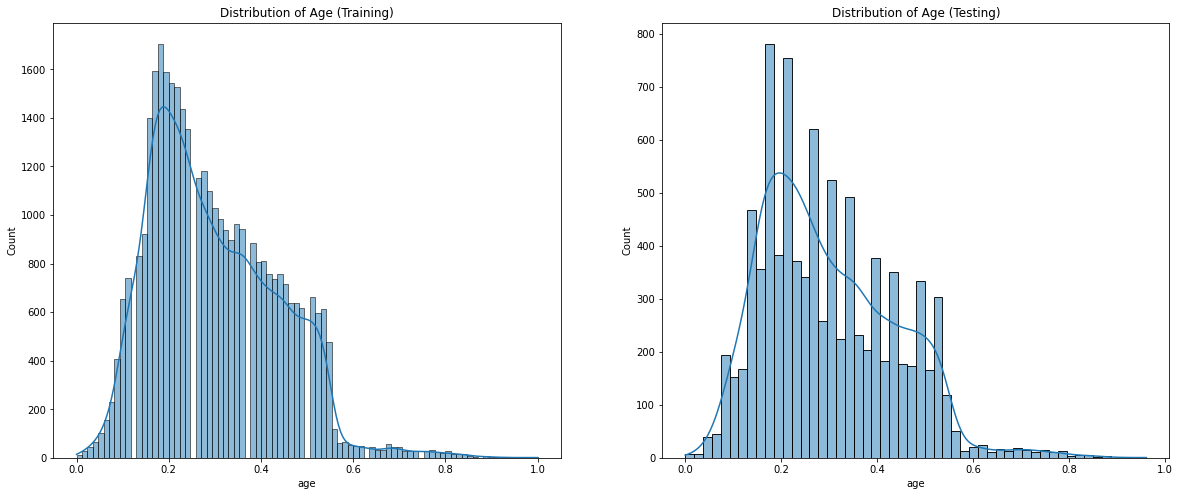

In [17]:
print('Normalized training age with mean {:.2f} and a std of {:.2f}'.format(df_x_train_norm.age.mean(), df_x_test_norm.age.std()))
print('Normalized testing age with mean {:.2f} and a std of {:.2f}'.format(df_x_test_norm.age.mean(), df_x_train_norm.age.std()))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df_x_train_norm, x='age', kde=True, ax=ax[0]).set_title('Distribution of Age (Training)')
sns.histplot(data=df_x_test_norm, x='age', kde=True, ax=ax[1]).set_title('Distribution of Age (Testing)');